## 1. Instalación y carga de librerías

In [1]:
!pip install nltk wordcloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package punkt to /home/ana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ana/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Carga de datos de ejemplo
Usaremos un pequeño conjunto de reseñas de ejemplo.

In [17]:
data = {
    'review': [
        'Me encantó este producto, la calidad es excelente y llegó rápido.',
        'Muy malo, se rompió al segundo día.',
        'No está mal, pero podría ser mejor.',
        'Excelente relación calidad-precio. Muy recomendable.',
        'No me gustó, el material se siente barato.'
    ]
}
df = pd.DataFrame(data)
df

,Unnamed: 0,Review_text,Rating
0,0,Airbnb We suffered a severe bedbug infestation...,NaN
1,1,Had to interrupt the stay due to mold and unsa...,Rated 1 out of 5 stars
2,2,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars
3,3,Airbnb personal safety. They deem a significan...,Rated 1 out of 5 stars
4,4,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars
5,5,"I've been a verified member since 2019, travel...",Rated 1 out of 5 stars
6,6,I recently had a very disappointing experience...,Rated 1 out of 5 stars
7,7,The worst customer service with the worst gues...,NaN
8,8,Was given an awful and false review which was ...,Rated 1 out of 5 stars
9,9,Writing as a host I have concerns re Air BnB's...,Rated 2 out of 5 stars


## 3. Tokenización
Dividimos el texto en palabras.
Según la documentación de nltk

```
 Return a tokenized copy of *text*,
using NLTK's recommended word tokenizer
(currently an improved :class:`.TreebankWordTokenizer`
along with :class:`.PunktSentenceTokenizer`
for the specified language).

:param text: text to split into words
:type text: str
:param language: the model name in the Punkt corpus
:type language: str
:param preserve_line: A flag to decide wheth
```



In [18]:
df['tokens'] = df['review'].apply(word_tokenize)
df[['review', 'tokens']]

,Unnamed: 0,Review_text,Rating,tokens
0,0,Airbnb We suffered a severe bedbug infestation...,NaN,"[Airbnb, We, suffered, a, severe, bedbug, infe..."
1,1,Had to interrupt the stay due to mold and unsa...,Rated 1 out of 5 stars,"[Had, to, interrupt, the, stay, due, to, mold,..."
2,2,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars,"[We, used, Airbnb, for, an, excursion, in, Fra..."
3,3,Airbnb personal safety. They deem a significan...,Rated 1 out of 5 stars,"[Airbnb, personal, safety, ., They, deem, a, s..."
4,4,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars,"[We, used, Airbnb, for, an, excursion, in, Fra..."
5,5,"I've been a verified member since 2019, travel...",Rated 1 out of 5 stars,"[I, 've, been, a, verified, member, since, 201..."
6,6,I recently had a very disappointing experience...,Rated 1 out of 5 stars,"[I, recently, had, a, very, disappointing, exp..."
7,7,The worst customer service with the worst gues...,NaN,"[The, worst, customer, service, with, the, wor..."
8,8,Was given an awful and false review which was ...,Rated 1 out of 5 stars,"[Was, given, an, awful, and, false, review, wh..."
9,9,Writing as a host I have concerns re Air BnB's...,Rated 2 out of 5 stars,"[Writing, as, a, host, I, have, concerns, re, ..."


## 4. Eliminación de stopwords
Quitamos palabras vacías que no aportan mucho significado.

In [19]:
stop_words = set(stopwords.words('spanish'))
df['tokens_clean'] = df['tokens'].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words and w.isalpha()])
df[['review', 'tokens_clean']]

,Unnamed: 0,Review_text,Rating,tokens,tokens_clean
0,0,Airbnb We suffered a severe bedbug infestation...,NaN,"[Airbnb, We, suffered, a, severe, bedbug, infe...","[airbnb, suffered, severe, bedbug, infestation..."
1,1,Had to interrupt the stay due to mold and unsa...,Rated 1 out of 5 stars,"[Had, to, interrupt, the, stay, due, to, mold,...","[interrupt, stay, due, mold, unsanitary, condi..."
2,2,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars,"[We, used, Airbnb, for, an, excursion, in, Fra...","[used, airbnb, excursion, france, return, land..."
3,3,Airbnb personal safety. They deem a significan...,Rated 1 out of 5 stars,"[Airbnb, personal, safety, ., They, deem, a, s...","[airbnb, personal, safety, deem, significant, ..."
4,4,We used Airbnb for an excursion in France. On ...,Rated 1 out of 5 stars,"[We, used, Airbnb, for, an, excursion, in, Fra...","[used, airbnb, excursion, france, return, land..."
5,5,"I've been a verified member since 2019, travel...",Rated 1 out of 5 stars,"[I, 've, been, a, verified, member, since, 201...","[verified, member, since, traveling, often, us..."
6,6,I recently had a very disappointing experience...,Rated 1 out of 5 stars,"[I, recently, had, a, very, disappointing, exp...","[recently, disappointing, experience, airbnb, ..."
7,7,The worst customer service with the worst gues...,NaN,"[The, worst, customer, service, with, the, wor...","[worst, customer, service, worst, guests, alre..."
8,8,Was given an awful and false review which was ...,Rated 1 out of 5 stars,"[Was, given, an, awful, and, false, review, wh...","[given, awful, false, review, ableist, party, ..."
9,9,Writing as a host I have concerns re Air BnB's...,Rated 2 out of 5 stars,"[Writing, as, a, host, I, have, concerns, re, ...","[writing, host, concerns, air, bnb, ability, d..."


## 5. Frecuencias de palabras

In [20]:
all_tokens = [token for tokens in df['tokens_clean'] for token in tokens]
word_freq = Counter(all_tokens)
word_freq.most_common(10)

[('airbnb', 13),
 ('host', 11),
 ('bnb', 10),
 ('air', 9),
 ('guest', 9),
 ('could', 8),
 ('see', 7),
 ('review', 7),
 ('time', 7),
 ('used', 6)]

## 6. Nube de palabras

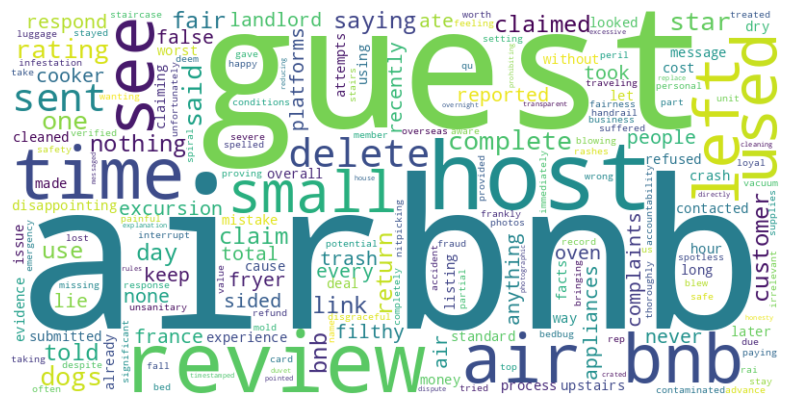

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()